This notebook conducts an analysis of the components of the A8, D8, and E8 algebras' SOCMs (see section Datasets of the papaer for notations). It begins by parsing a dataset containing permutations and associated coefficient vectors. The script then identifies distinct classes of SOCMs, grouping elements sharing similar components. It generates statistics on the class distribution and creates a bar plot using Matplotlib to visualize the number of elements in each class. Finally, the resulting frequencies are saved to a file. Similar analysis repeats for A8, D8, and E8.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import choice
from collections import Counter
from copy import deepcopy

from tqdm import tqdm
import time

In [8]:
# Import data -- in format 
# [[(permutation order of roots in W definition), [list of invariant coefficient vectors], ...all permutations]

# Parse string into list of lists of float
def parseString(string):
    tmp = list(string[1:-2].split(", [["))
    return [tmp[0], [ [float(i) for i in list(elem.split(", "))]  for elem in list(tmp[1][:-1].split("], ["))] ]

start = time.time()

# Modified files are used: all 1/2, 3/2, 5/2 are replaced by 0.5, 1.5, 2,5
with open('ADE_Data\E8inv_Data_mod.txt','r') as file:
    dataE8 = [ parseString(line.rstrip())[1] for line in file]

end = time.time()
print(end - start)

data_size = len(dataE8)

62.41157341003418


In [34]:
# Find distinct classes of invariants in E8 (class = invaraints with the same components)
classesE8 = np.zeros(data_size, dtype = int)    
for idx1 in tqdm(range(len(dataE8))):
    if classesE8[idx1] != 0: # check if we've assigned a class to this element already
        continue
    classesE8[idx1] = idx1+1 # record that elem itself in its own class (shift classes number's by 1 during run for technical reasons)
    for idx2 in range(idx1+1,len(dataE8)):
        if dataE8[idx1]==dataE8[idx2] or dataE8[idx1]==(-1) * dataE8[idx2]: # identify components which are the same up to a minus sign
            classesE8[idx2] = idx1+1 # record that elem idx2 is in the same class as element idx1 (shift classes number's by 1 during run)

classesE8 = classesE8 - 1 # shift classes number's back by 1

100%|██████████| 40320/40320 [00:22<00:00, 1755.99it/s] 


In [ ]:
# Record classes of all elements to a file
with open('ADE_Data\E8_classes_all_elems.txt','w') as file:
    file.write('Permutation \t\t class\n')
    for idx in range(data_size):
        file.write( str(dataE8[idx][0]) + "\t %1d" % (classesE8[idx]) + '\n')

Number of classes in E8:  128


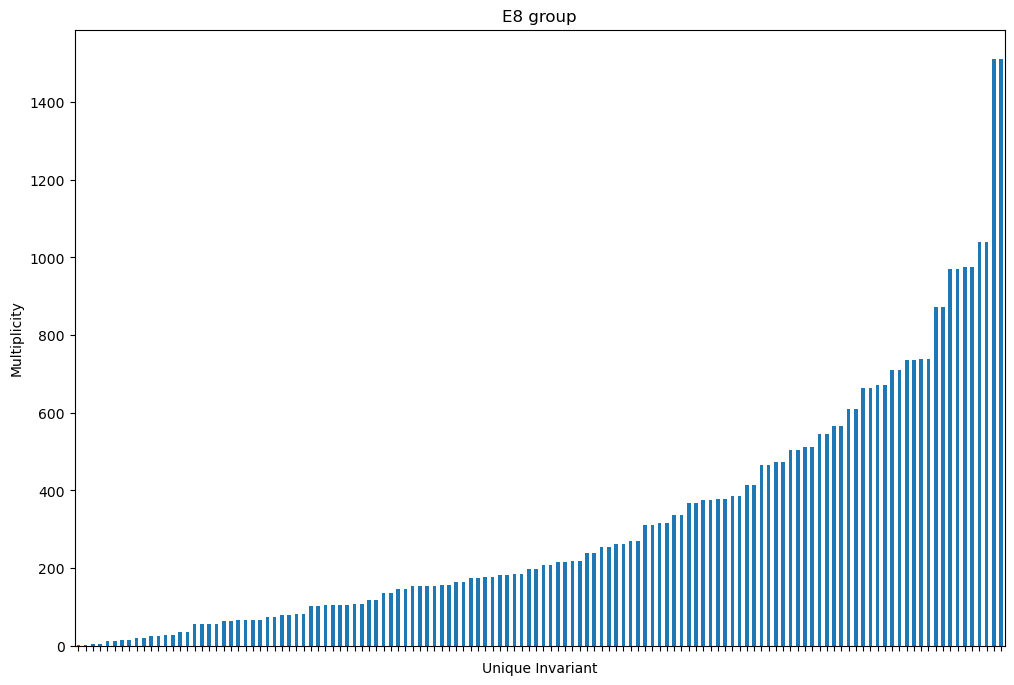

In [35]:
# Create a dictionary containing pairs (class index, number of elements in class)
classes_counterE8 = dict(Counter(classesE8))
print('Number of classes in E8: ', len(classes_counterE8))

# Sort classes by the number of elements
tempDict = classes_counterE8
classes_counterE8 = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}
    
# plot number of elements in classes for E8
plt.figure(figsize=(12, 8));
freq_series = pd.Series(list(classes_counterE8.values()));
fig = freq_series.plot(kind='bar');
fig.set_title('E8 group');
fig.set_xlabel('Unique Invariant');
fig.set_ylabel('Multiplicity');
fig.set_xticklabels([]);

In [ ]:
# Highest frequency
classes_counterE8[ list(classes_counterE8.keys())[-1] ]

In [ ]:
# Record found classes
with open('ADE_Data\E8_classes.txt','w') as file:
    file.write('Permutation \t\t Invariant No \t Frequency \n')
    for invar_no, freq in classes_counterE8.items():
        file.write( str(dataE8[invar_no][0]) + "\t %5d \t %4d" % (invar_no,freq) + '\n')

In [ ]:
# Similar analysis for D8

In [12]:
# Find distinct classes of invariants in D8
classesD8 = np.zeros(data_size, dtype = int) # record that elem idx2 is in the same class as element idx1          
for idx1 in tqdm(range(len(dataD8))):
    if classesD8[idx1] != 0:
        continue
    classesD8[idx1] = idx1+1 # record that elem itself in its own class, shift classes number's by 1 during run
    for idx2 in range(idx1+1,len(dataD8)):
        if dataD8[idx1][1]==dataD8[idx2][1]:    
            classesD8[idx2] = idx1+1 # record that elem idx2 is in the same class as element idx1, shift classes number's by 1 during run
            
classesD8 = classesD8 - 1 # shift classes number's back by 1

100%|██████████| 40320/40320 [00:01<00:00, 23782.34it/s]


In [13]:
# Record classes of all elements
with open('ADE_Data\D8_classes_all_elems.txt','w') as file:
    file.write('Permutation \t\t class\n')
    for idx in range(data_size):
        file.write( str(dataD8[idx][0]) + "\t %1d" % (classesD8[idx]) + '\n')

Number of classes in D8:  128


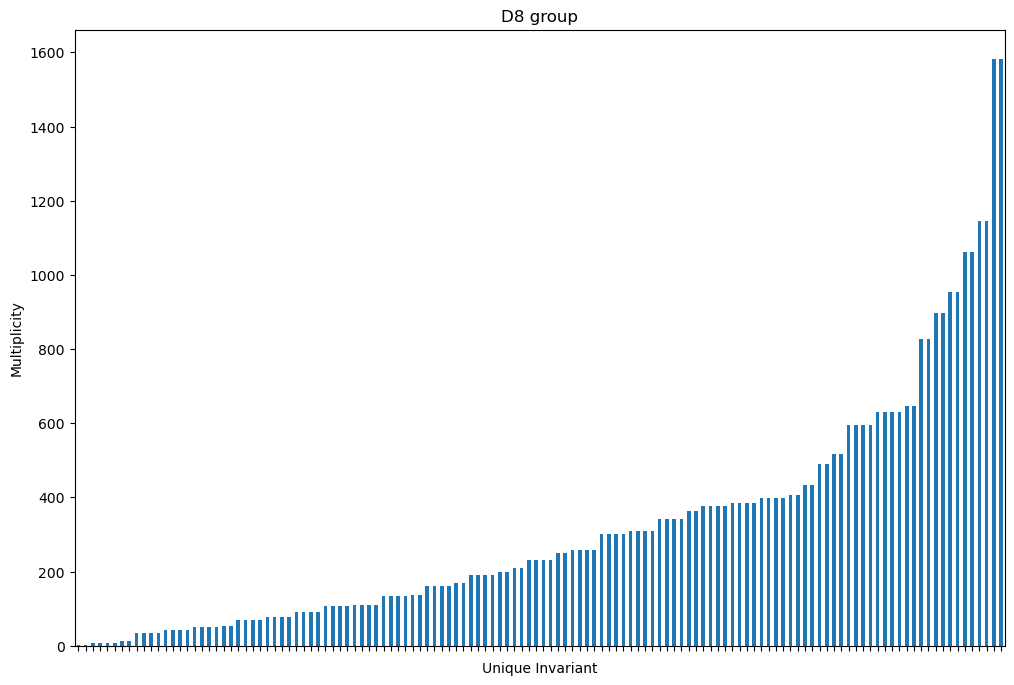

In [16]:
classes_counterD8 = dict(Counter(classesD8))
print('Number of classes in D8: ', len(classes_counterD8))
    
# Sort records by the number of occurances
tempDict = classes_counterD8
classes_counterD8 = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}    

# distribution of different classes for D8
plt.figure(figsize=(12, 8));
freq_series = pd.Series(list(classes_counterD8.values()));
fig = freq_series.plot(kind='bar');
fig.set_title('D8 group');
fig.set_xlabel('Unique Invariant');
fig.set_ylabel('Multiplicity');
fig.set_xticklabels([]);

In [17]:
# Highest frequency
classes_counterD8[ list(classes_counterD8.keys())[-1] ]

1582

In [18]:
# Record found classes
with open('ADE_Data\D8_classes.txt','w') as file:
    file.write('Permutation \t\t Invariant No \t Frequency \n')
    for invar_no, freq in classes_counterD8.items():
        file.write( str(dataD8[invar_no][0]) + "\t %5d \t %4d" % (invar_no,freq) + '\n')

In [ ]:
# Similar analysis for A8

In [19]:
# Find distinct classes of invariants in A8
classesA8 = np.zeros(data_size, dtype = int) # record that elem idx2 is in the same class as element idx1          
for idx1 in tqdm(range(len(dataA8))):
    if classesA8[idx1] != 0:
        continue
    classesA8[idx1] = idx1+1 # record that elem itself in its own class, shift classes number's by 1 during run
    for idx2 in range(idx1+1,len(dataA8)):
        if dataA8[idx1][1]==dataA8[idx2][1]:    
            classesA8[idx2] = idx1+1 # record that elem idx2 is in the same class as element idx1, shift classes number's by 1 during run
            
classesA8 = classesA8 - 1 # shift classes number's back by 1

100%|██████████| 40320/40320 [00:01<00:00, 31732.49it/s]


In [20]:
# Record classes of all elements
with open('ADE_Data\A8_classes_all_elems.txt','w') as file:
    file.write('Permutation \t\t class\n')
    for idx in range(data_size):
        file.write( str(dataA8[idx][0]) + "\t %1d" % (classesA8[idx]) + '\n')

Number of classes in A8:  128


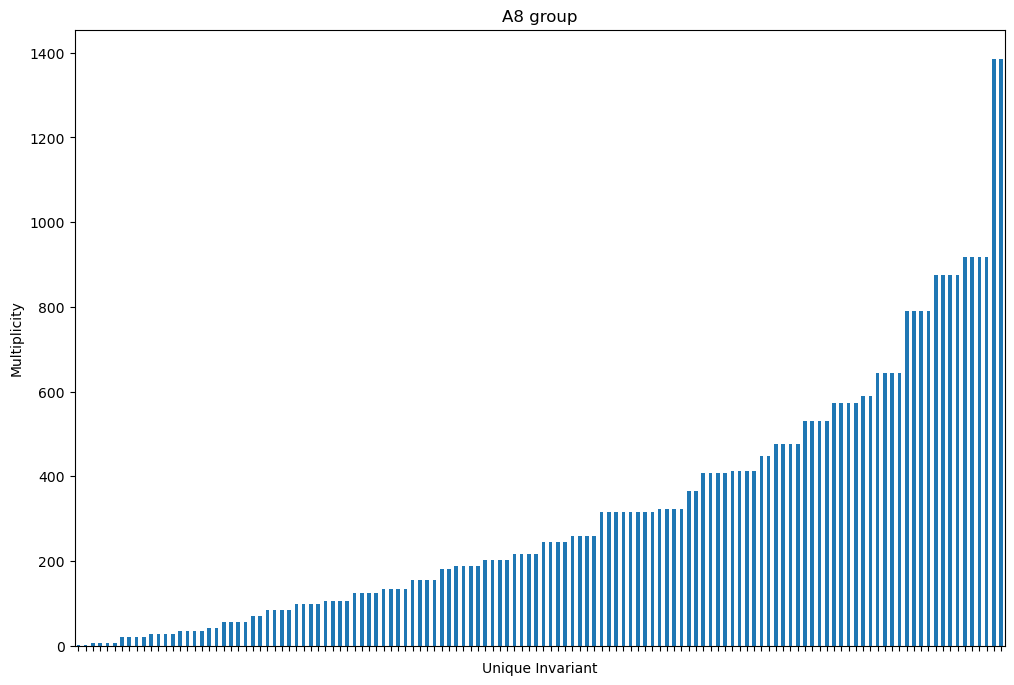

In [23]:
classes_counterA8 = dict(Counter(classesA8))
print('Number of classes in A8: ', len(classes_counterA8))
    
# Sort records by the number of occurances
tempDict = classes_counterA8
classes_counterA8 = {k: v for k, v in sorted(tempDict.items(), key=lambda item: item[1])}
    
# distribution of different classes for A8
plt.figure(figsize=(12, 8));
freq_series = pd.Series(list(classes_counterA8.values()));
fig = freq_series.plot(kind='bar');
fig.set_title('A8 group');
fig.set_xlabel('Unique Invariant');
fig.set_ylabel('Multiplicity');
fig.set_xticklabels([]);
#fig.xaxis.set_visible(False)

In [24]:
# Highest frequency
classes_counterA8[ list(classes_counterA8.keys())[-1] ]

1385

In [25]:
# Record found classes
with open('ADE_Data\A8_classes.txt','w') as file:
    file.write('Permutation \t\t Invariant No \t Frequency \n')
    for invar_no, freq in classes_counterA8.items():
        file.write( str(dataA8[invar_no][0]) + "\t %5d \t %4d" % (invar_no,freq) + '\n')